<div style="border-radius: 30px 0 30px 0; border: 2px solid #00ea98; padding: 20px; background-color: #0a141b; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #7ab052; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">About the Author</h1>
</div>



# **Arshman Khalid**  
<p style="font-size: 1.5rem; font-weight: bold;">Data Scientist | Software Engineer | ex Consultant PwC | ex Senior Data Analyst Fortune 500</p>

With over 5 years of expertise in data science and software engineering, I am dedicated to transforming complex data into actionable insights. My focus lies in predictive analytics, data strategy, and the implementation of robust machine learning models that drive measurable business outcomes. I have a track record of optimizing operations, reducing costs, and improving decision-making processes across industries. Proficient in Python, Alteryx, Power BI, and cloud platforms.

When I am not wrangling datasets, you will find me attempting to code my way to the perfect cup of coffee!


<div style="text-align: left; font-family: Arial, sans-serif; margin-top: 20px;">
    <a href="https://www.linkedin.com/in/arshmankhalid/" style="text-decoration: none; color: #fff; margin-right: 10px;">
        <span style="background-color: #0077B5; padding: 8px 20px; border-radius: 5px; font-size: 14px; display: inline-block; width: 120px; text-align: center;">LinkedIn</span>
    </a>
    <a href="https://x.com/arshmankhalid" style="text-decoration: none; color: #fff; margin-right: 10px;">
        <span style="background-color: #000; padding: 8px 20px; border-radius: 5px; font-size: 14px; display: inline-block; width: 120px; text-align: center;">X</span>
    </a>
    <a href="https://github.com/arshmankhalid88" style="text-decoration: none; color: #fff; margin-right: 10px;">
        <span style="background-color: #333; padding: 8px 20px; border-radius: 5px; font-size: 14px; display: inline-block; width: 120px; text-align: center;">GitHub</span>
    </a>
    <a href="https://www.kaggle.com" style="text-decoration: none; color: #fff; margin-right: 10px;">
        <span style="background-color: #20BEFF; padding: 8px 20px; border-radius: 5px; font-size: 14px; display: inline-block; width: 120px; text-align: center;">Kaggle</span>
    </a>
</div>


<div style="border-radius: 30px 0 30px 0px; border: 2px solid #00ea98; padding: 20px; background-color: #0a141b; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #7ab052; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Load Libraries</h1>
</div>


In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

2024-10-31 10:04:21.919828: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


<div style="border-radius: 30px 0 30px 0px; border: 2px solid #00ea98; padding: 20px; background-color: #0a141b; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #7ab052; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Load Dataset</h1>
</div>


In [3]:
data = pd.read_csv("ETH-BTC-USD.csv")
data['Date'] = pd.to_datetime(data['Date'])
data=data.sort_values(by="Date",ascending=True)
df = data.copy()
data.set_index("Date",inplace=True)
data.head()

,Open,High,Low,Close,Adj Close,Volume,Currency
Date,,,,,,,
2018-11-14,206.533997,207.044998,174.084000,181.397003,181.397003,2.595330e+09,Etherium
2018-11-14,6351.240234,6371.549805,5544.089844,5738.350098,5738.350098,7.398940e+09,Bitcoin
2018-11-15,181.899002,184.251007,170.188995,180.806000,180.806000,2.638410e+09,Etherium
2018-11-15,5736.149902,5774.819824,5358.379883,5648.029785,5648.029785,7.032140e+09,Bitcoin
2018-11-16,180.865005,181.350006,173.126007,175.177002,175.177002,2.015330e+09,Etherium


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3654 entries, 2018-11-14 to 2023-11-14
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3654 non-null   float64
 1   High       3654 non-null   float64
 2   Low        3654 non-null   float64
 3   Close      3654 non-null   float64
 4   Adj Close  3654 non-null   float64
 5   Volume     3654 non-null   float64
 6   Currency   3654 non-null   object 
dtypes: float64(6), object(1)
memory usage: 228.4+ KB


In [5]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3.654000e+03
mean,12489.722362,12779.702503,12176.712024,12497.298504,12497.298504,2.132673e+10
std,15981.149824,16367.131613,15548.523408,15982.555689,15982.555689,1.657009e+10
min,84.279694,85.342743,82.829887,84.308296,84.308296,1.496177e+09
25%,1318.626008,1346.194641,1275.408967,1320.796630,1320.796630,9.610954e+09
50%,3880.535767,3964.966553,3783.871582,3881.728149,3881.728149,1.741543e+10
75%,20589.010253,21038.371580,20185.608885,20598.490722,20598.490722,2.857312e+10
max,67549.734380,68789.625000,66382.062500,67566.828130,67566.828130,3.509680e+11


We Can see that we have a dataset with 3654 rows in which we have 0 Missing Values. As you can see, the data has **7 columns**:
* **“Open”** for the opening price for the day
* **“High”** for the highest price during the day
* **“Low”** for the lowest price during the day
* **“Close”** for the closing price for the day
* **“Adj Close”** for the adjusted closing price
* **“Volume”** for transaction volume.
* **"Currency"** the type of the currency

In stock price, **adjusted closing price** reflects a stock’s closing price on any given day of trading that has been amended to include any distributions and corporate actions that occurred at any time prior to the next day’s open.

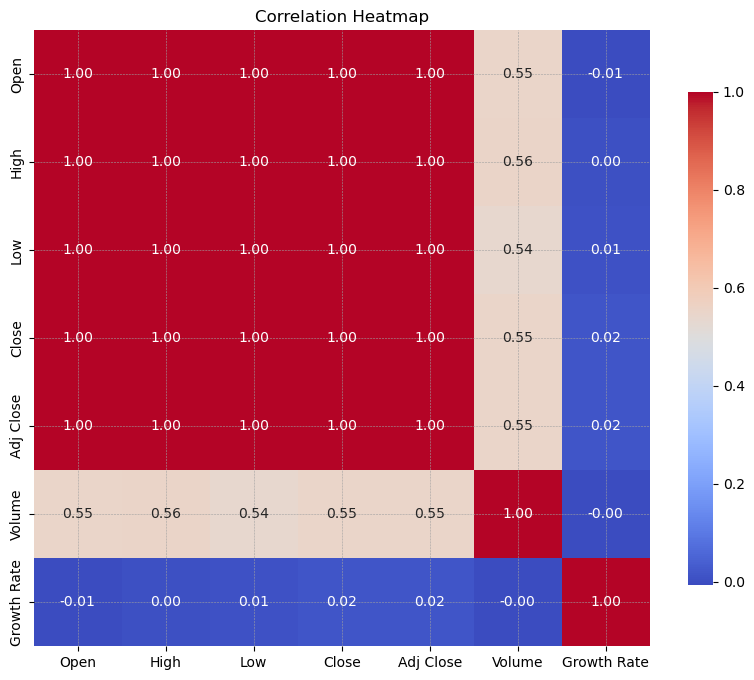

In [31]:
# Drop non-numeric columns or convert them
data_numeric = data.drop(columns=['Currency'])  # Drop the 'Currency' column if it's not needed

# Alternatively, convert specific columns to numeric
data['Volume'] = pd.to_numeric(data['Volume'], errors='coerce')  # Convert 'Volume' to numeric

# Recalculate the correlation matrix
correlation_matrix = data_numeric.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

plt.title('Correlation Heatmap')
plt.show()

<div style="border-radius: 30px 0 30px 0px; border: 2px solid #00ea98; padding: 20px; background-color: #0a141b; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #7ab052; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">EDA</h1>
</div>


## Splitting Data

We can notice that the currency column corresponds to the type of our currency which is ethier Bitcoin or Etherium. So it would make sens to split our data into a Bitcoin data and a Etherium data so we can analyse each individualy

In [6]:
btc = data[data["Currency"]=="Bitcoin"][["Open","High","Low","Close","Adj Close","Volume"]]
btc.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-11-14,6351.240234,6371.549805,5544.089844,5738.350098,5738.350098,7.398940e+09
2018-11-15,5736.149902,5774.819824,5358.379883,5648.029785,5648.029785,7.032140e+09
2018-11-16,5645.319824,5657.020020,5498.939941,5575.549805,5575.549805,5.279320e+09
2018-11-17,5578.580078,5578.580078,5519.560059,5554.330078,5554.330078,4.303150e+09
2018-11-18,5559.740234,5653.609863,5559.740234,5623.540039,5623.540039,4.159680e+09


In [7]:
eth = data[data["Currency"]=="Etherium"][["Open","High","Low","Close","Adj Close","Volume"]]
eth.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-11-14,206.533997,207.044998,174.084000,181.397003,181.397003,2.595330e+09
2018-11-15,181.899002,184.251007,170.188995,180.806000,180.806000,2.638410e+09
2018-11-16,180.865005,181.350006,173.126007,175.177002,175.177002,2.015330e+09
2018-11-17,175.360001,175.850998,172.869003,174.001007,174.001007,1.832800e+09
2018-11-18,174.175003,179.151993,174.175003,177.067001,177.067001,1.810920e+09


<div style="border-radius: 30px 0 30px 0px; border: 2px solid #00ea98; padding: 20px; background-color: #0a141b; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #7ab052; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Simple Plots</h1>
</div>


Let's start by plotting our data in graphs to have a general understanding of the variation of our data

#### Bitcoin

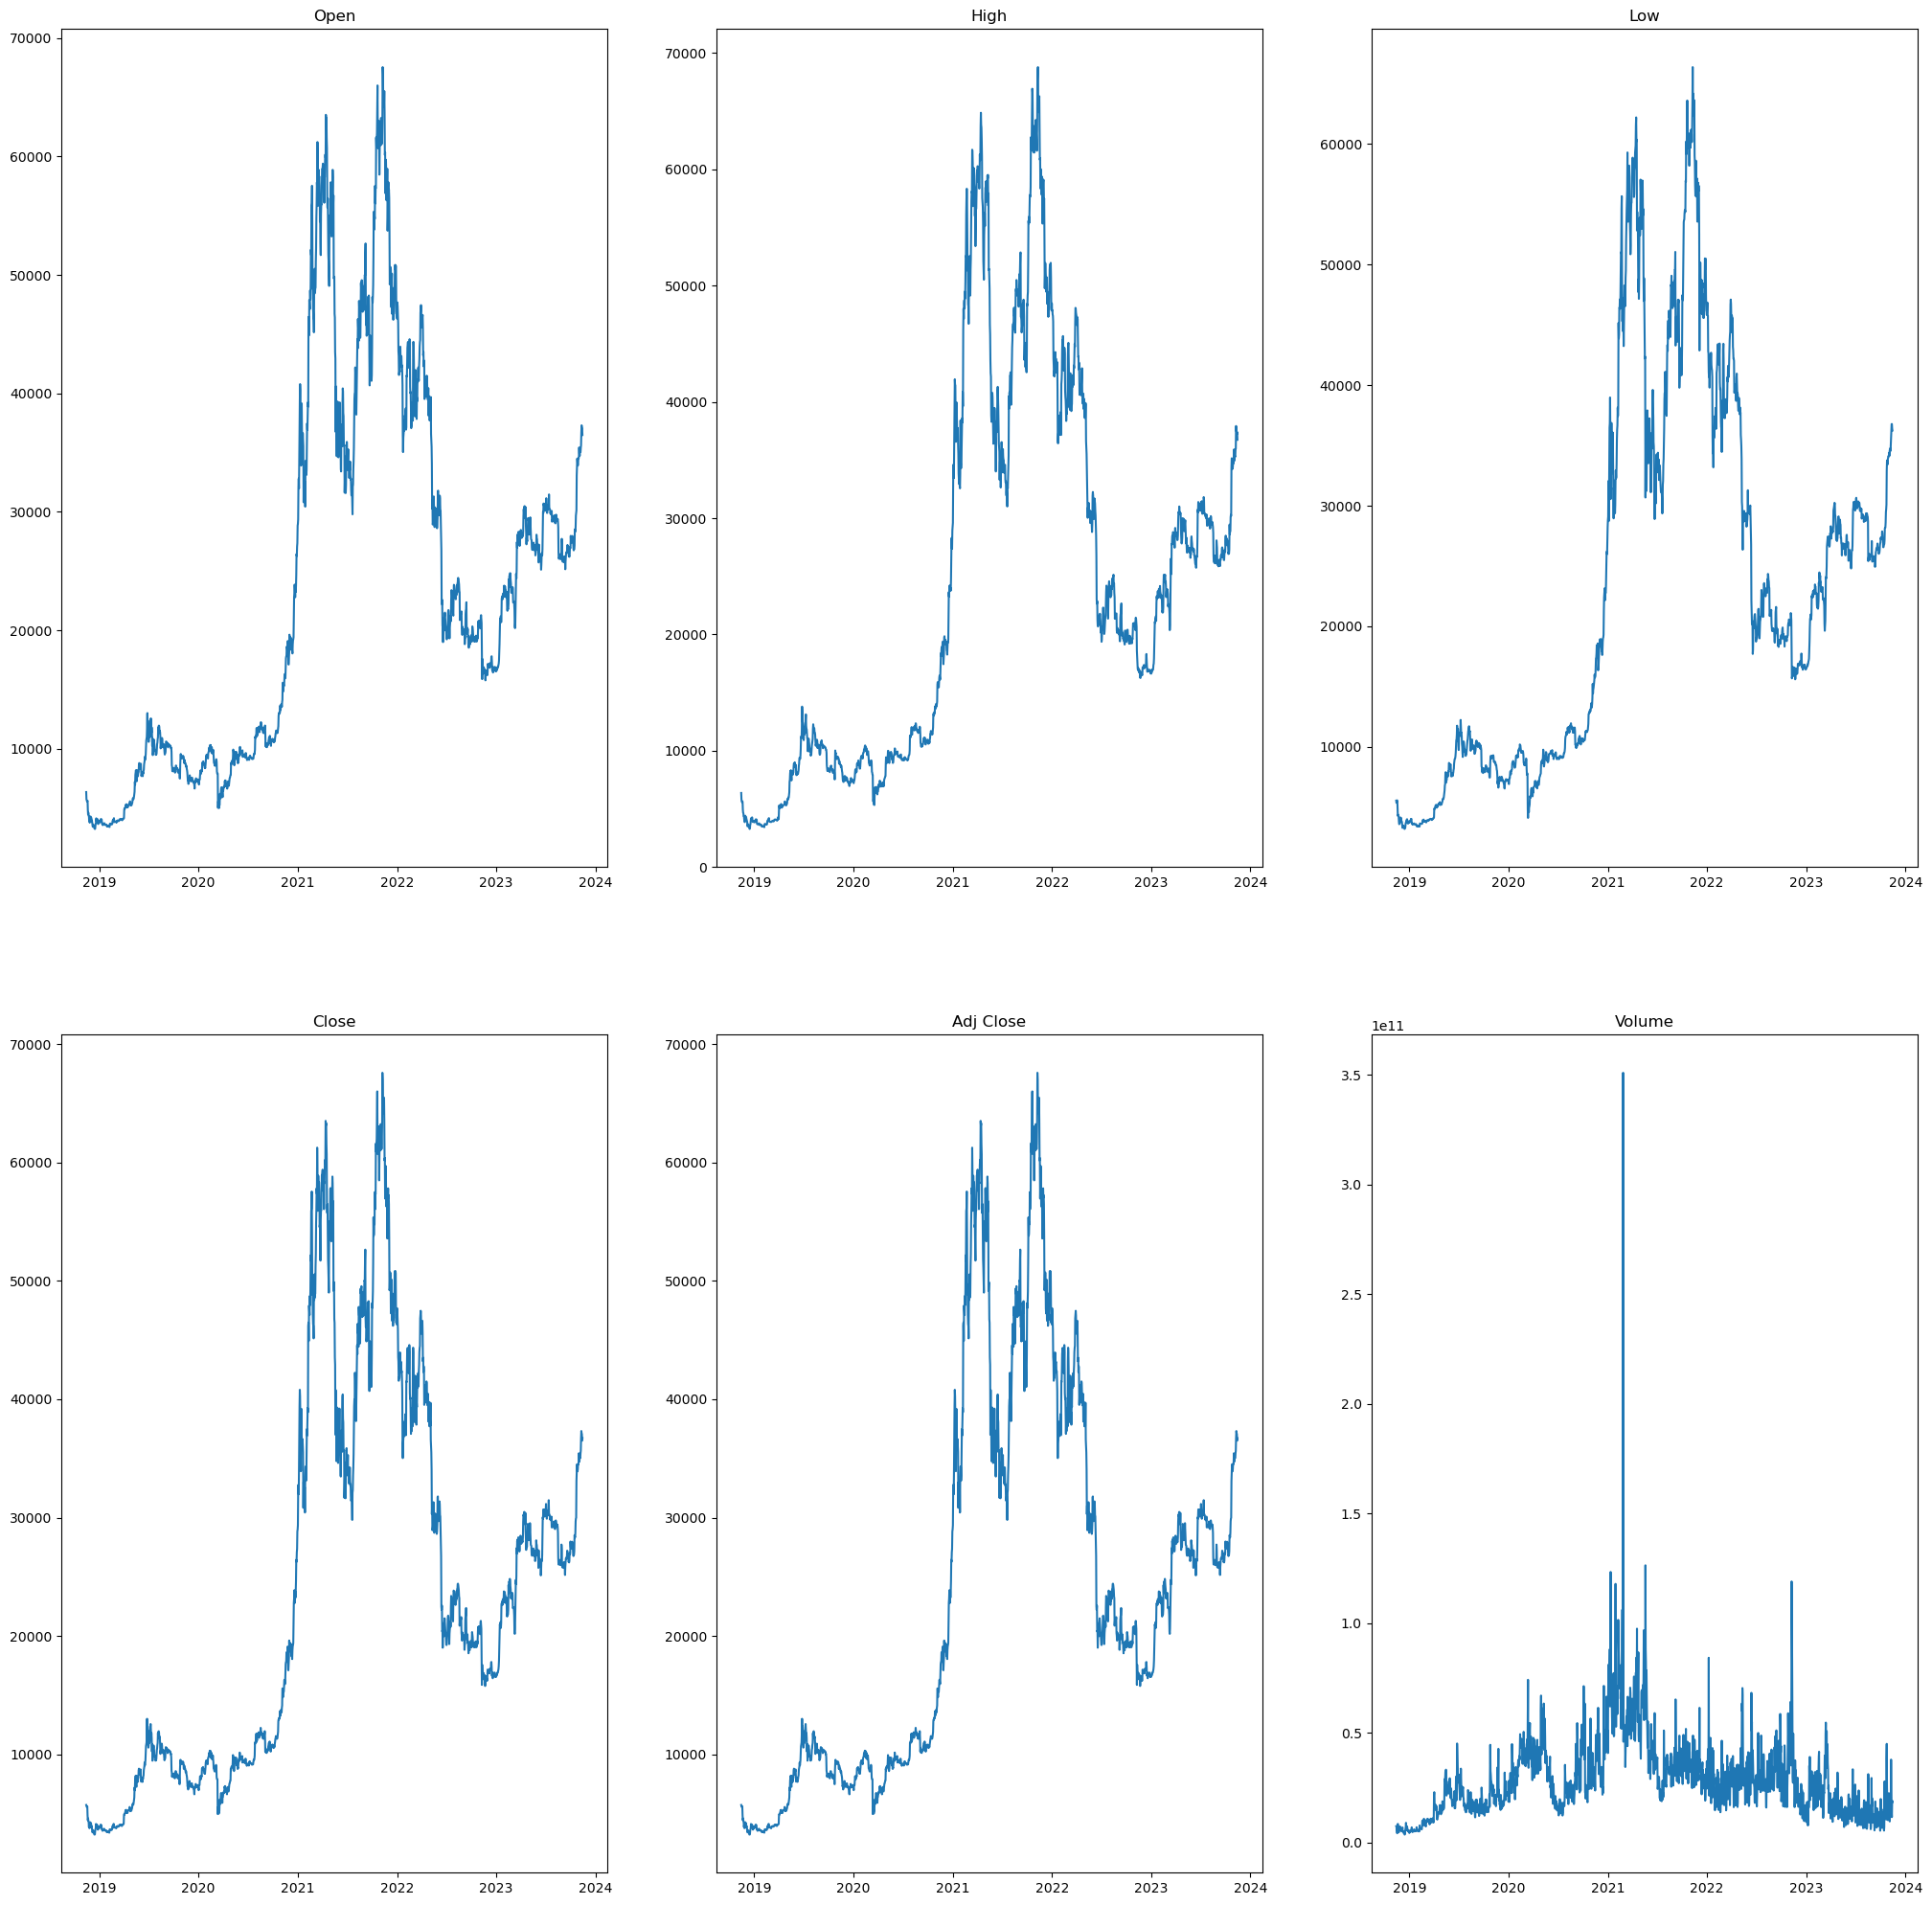

In [8]:
fig = plt.figure(figsize=(25,25))
i=1
for x in btc.columns :
    plt.subplot(2,3,i)
    ax=sns.lineplot(btc[x])
    ax.set(xlabel=None)
    plt.title(str(x), loc='center')
    plt.xlabel(None)
    plt.ylabel(None)
    i+=1
plt.show()

#### Etherium

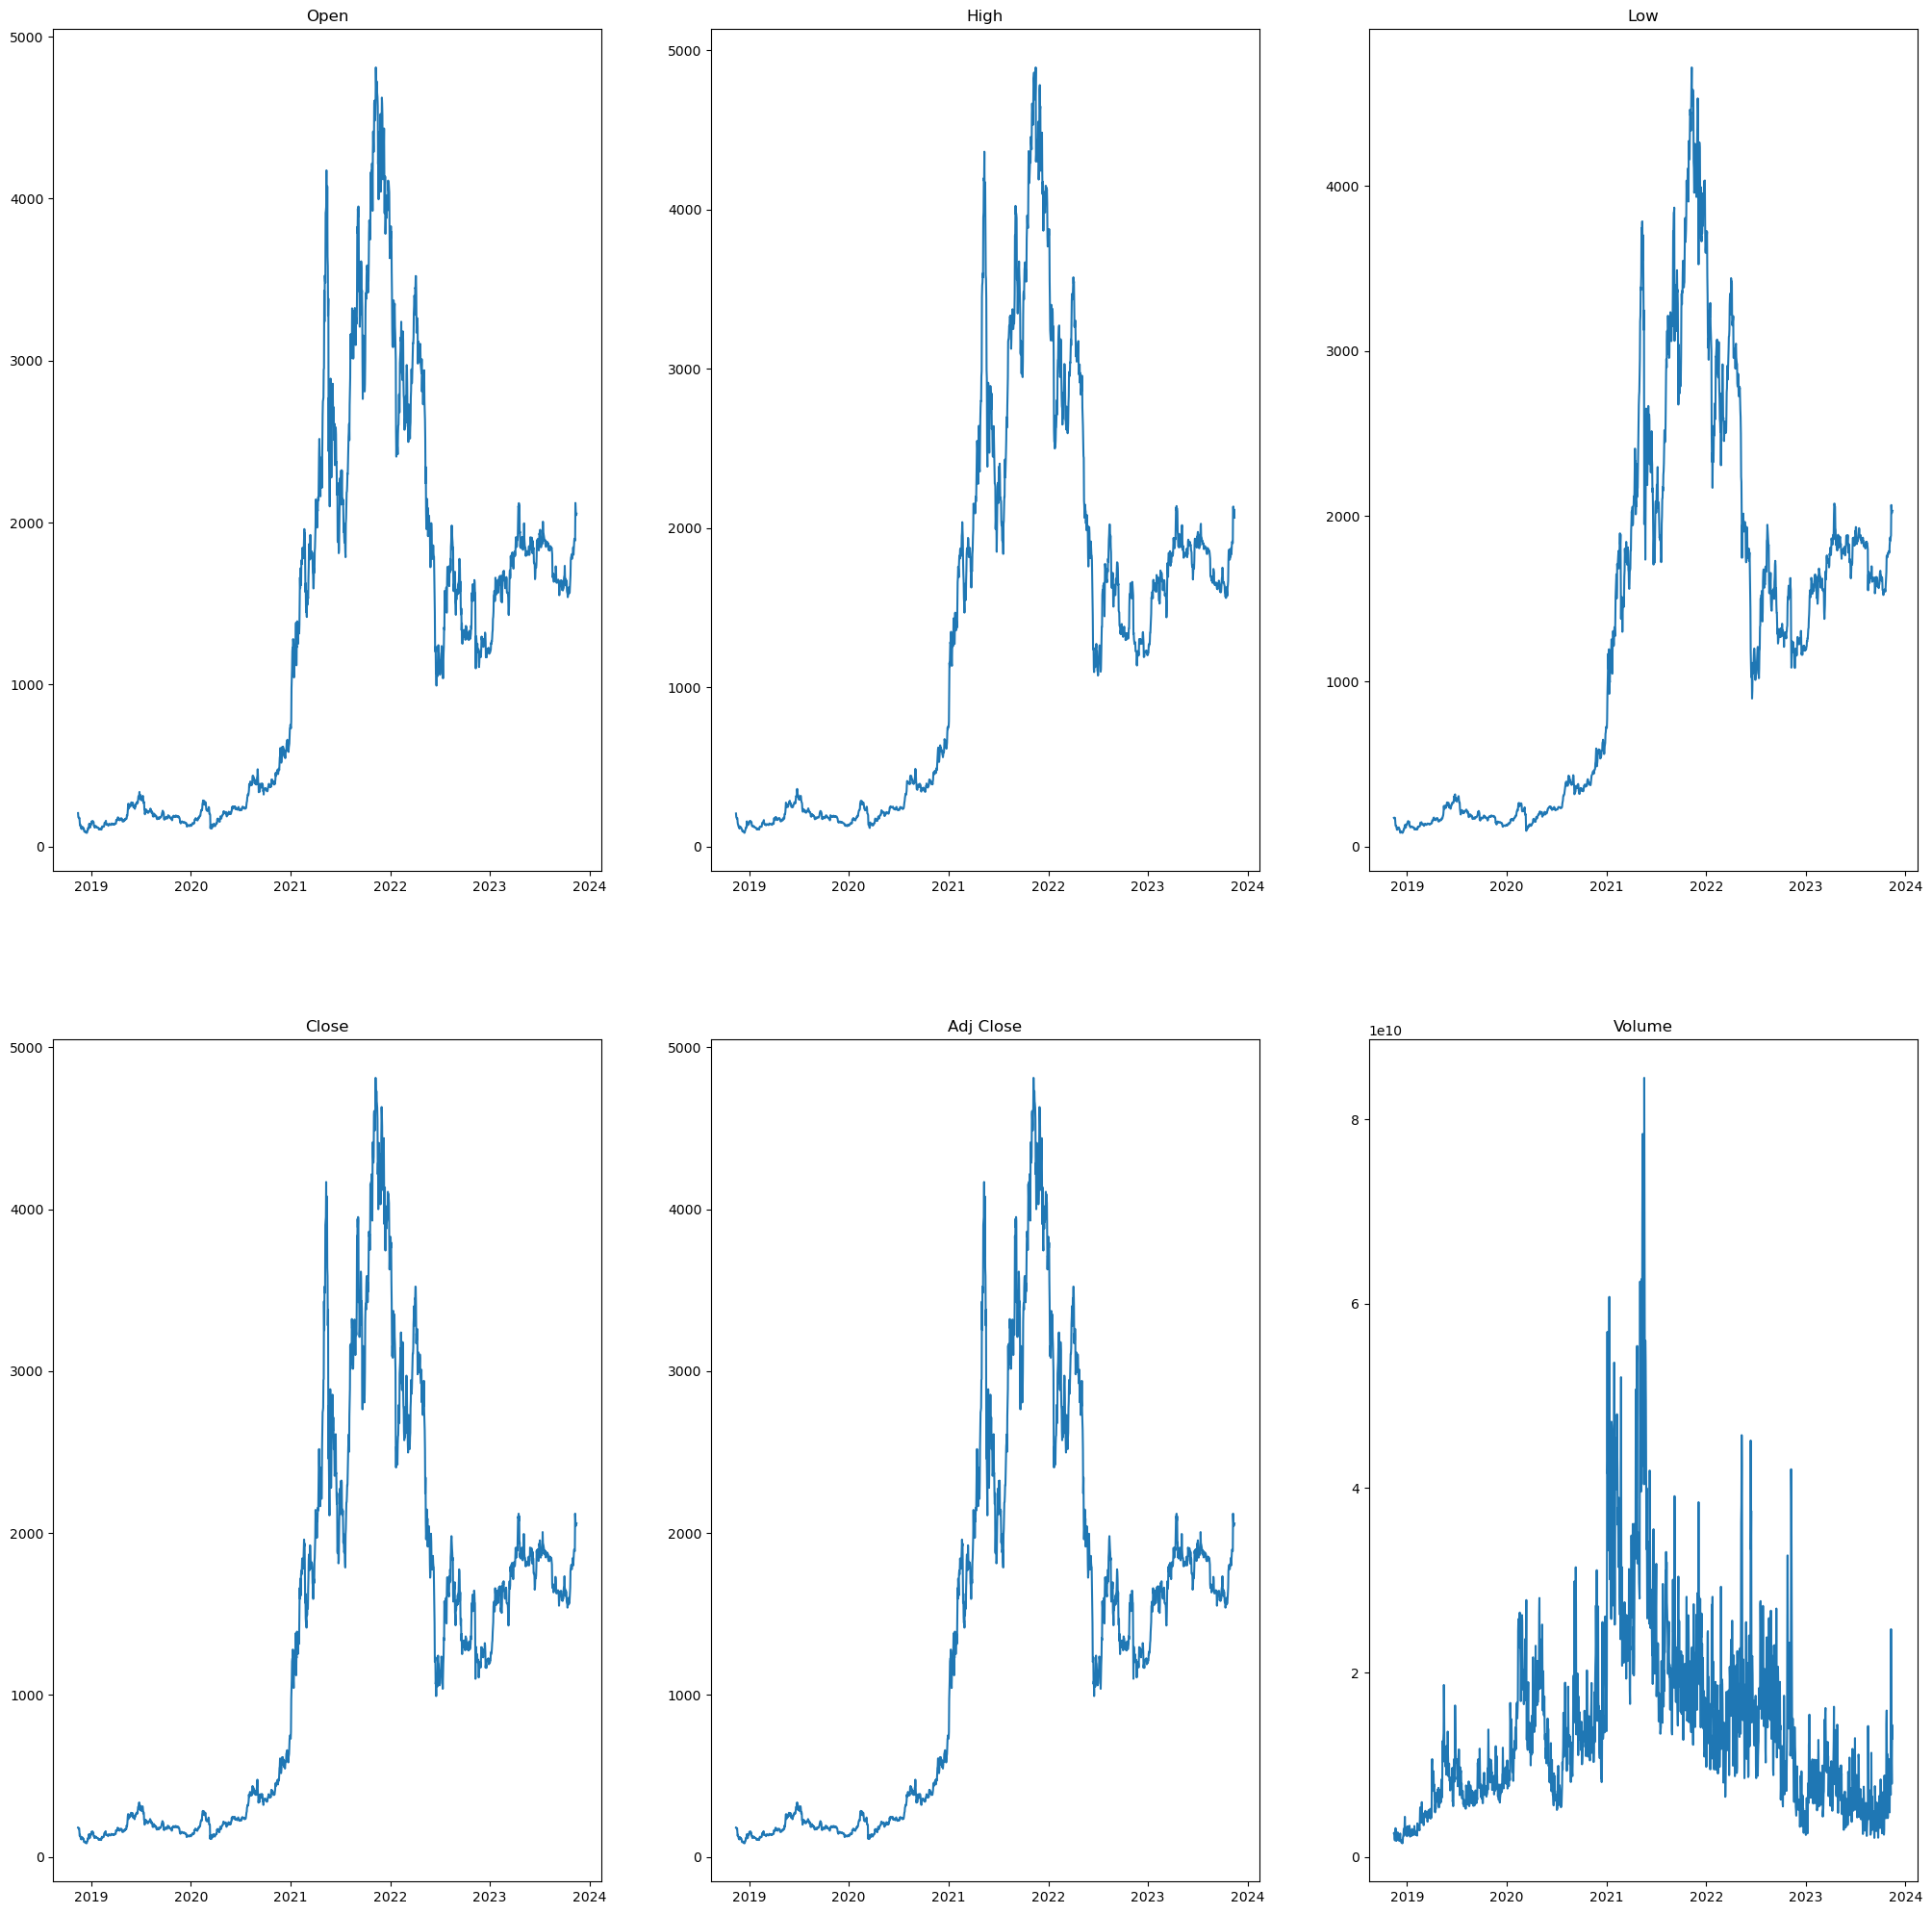

In [9]:
fig = plt.figure(figsize=(25,25))
i=1
for x in eth.columns :
    plt.subplot(2,3,i)
    ax=sns.lineplot(eth[x])
    ax.set(xlabel=None)
    plt.title(str(x), loc='center')
    plt.xlabel(None)
    plt.ylabel(None)
    i+=1
plt.show()

We can notice that all the charts except the Volume have a similar pattern and that's because after the opening price the stock market usually have a small variation up and down in which makes the plots of these prices follow the same pattern but for the Volume column it's pretty much a random process for the traded volume in a given day

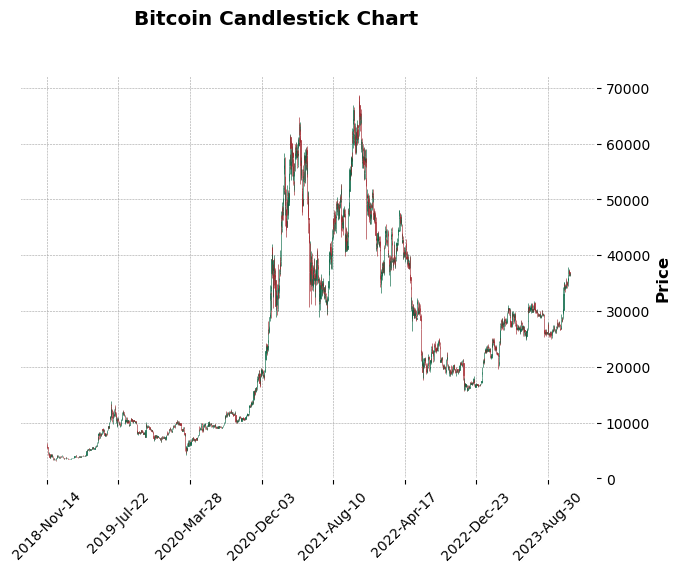

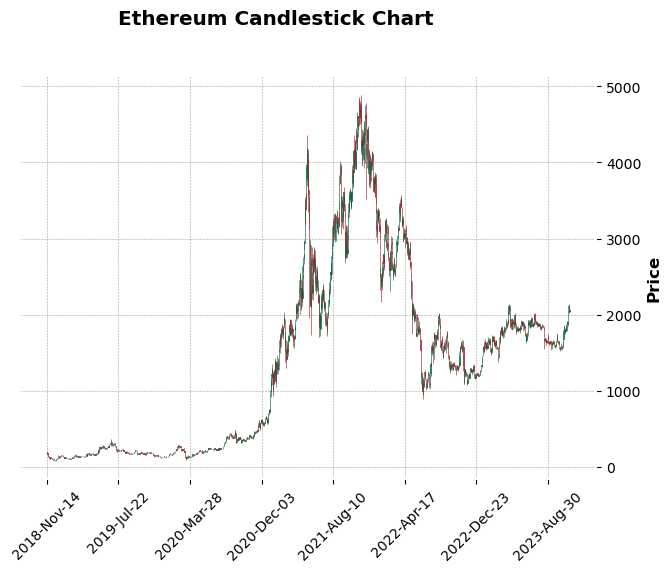

In [29]:
import mplfinance as mpf

# Prepare the data for candlestick chart
btc_candlestick = btc[['Open', 'High', 'Low', 'Close']].copy()
btc_candlestick.index.name = 'Date'

# Plotting the candlestick chart for Bitcoin
mpf.plot(btc_candlestick, type='candle', style='charles', title='Bitcoin Candlestick Chart', volume=False)

# Prepare the data for Ethereum
eth_candlestick = eth[['Open', 'High', 'Low', 'Close']].copy()
eth_candlestick.index.name = 'Date'

# Plotting the candlestick chart for Ethereum
mpf.plot(eth_candlestick, type='candle', style='charles', title='Ethereum Candlestick Chart', volume=False)


<div style="border-radius: 30px 0 30px 0px; border: 2px solid #00ea98; padding: 20px; background-color: #0a141b; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #7ab052; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Growth Rate</h1>
</div>


Growth rate is the percentage change in a value over a specific time period, often expressed as a percentage. The formula for calculating the growth rate is:

Growth Rate = (New Value - Old Value)/(Old Value) * 100%

#### Bitcoin

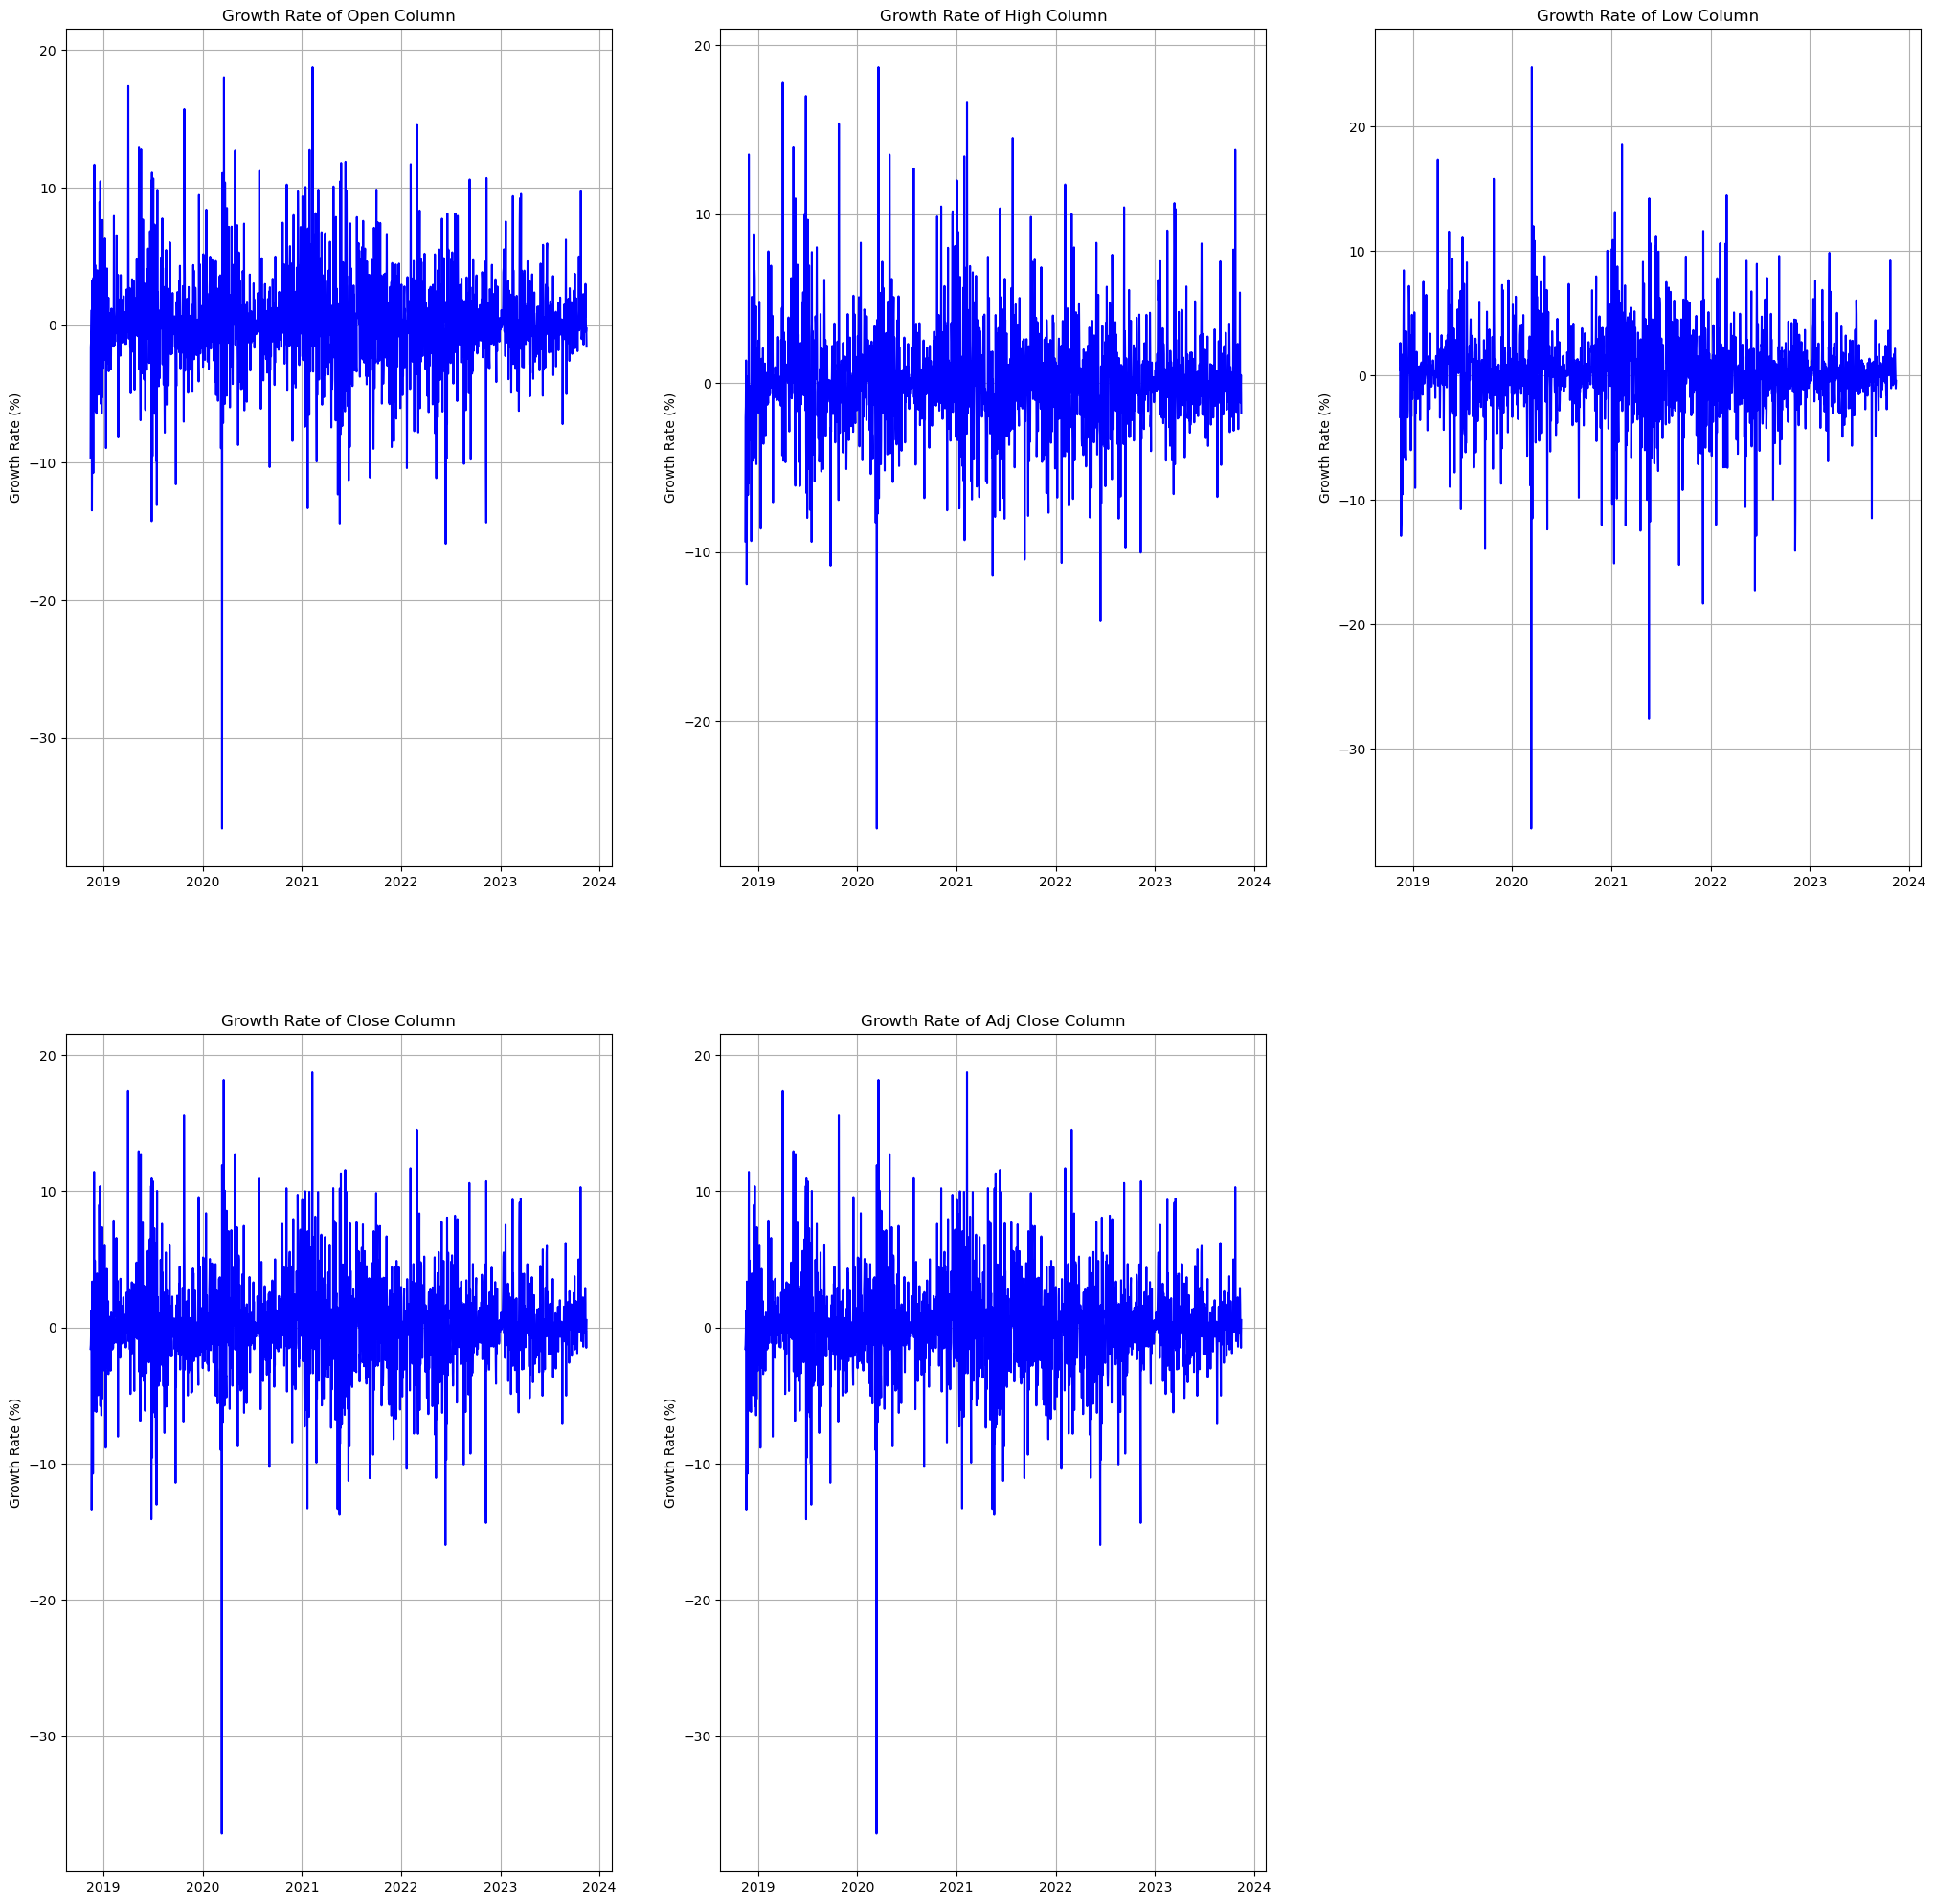

In [10]:
plt.figure(figsize=(25,25))
i=1
for x in btc.columns[:-1]:
    plt.subplot(2,3,i)
    data['Growth Rate'] = (btc[x] - btc[x].shift(1)) / btc[x].shift(1) * 100
    plt.plot(data.index, data['Growth Rate'], linestyle='-', color='b')
    plt.xlabel(None)
    plt.ylabel('Growth Rate (%)')
    plt.title(f'Growth Rate of {x} Column')
    plt.grid(True)
    i+=1
plt.show()

#### Etherium

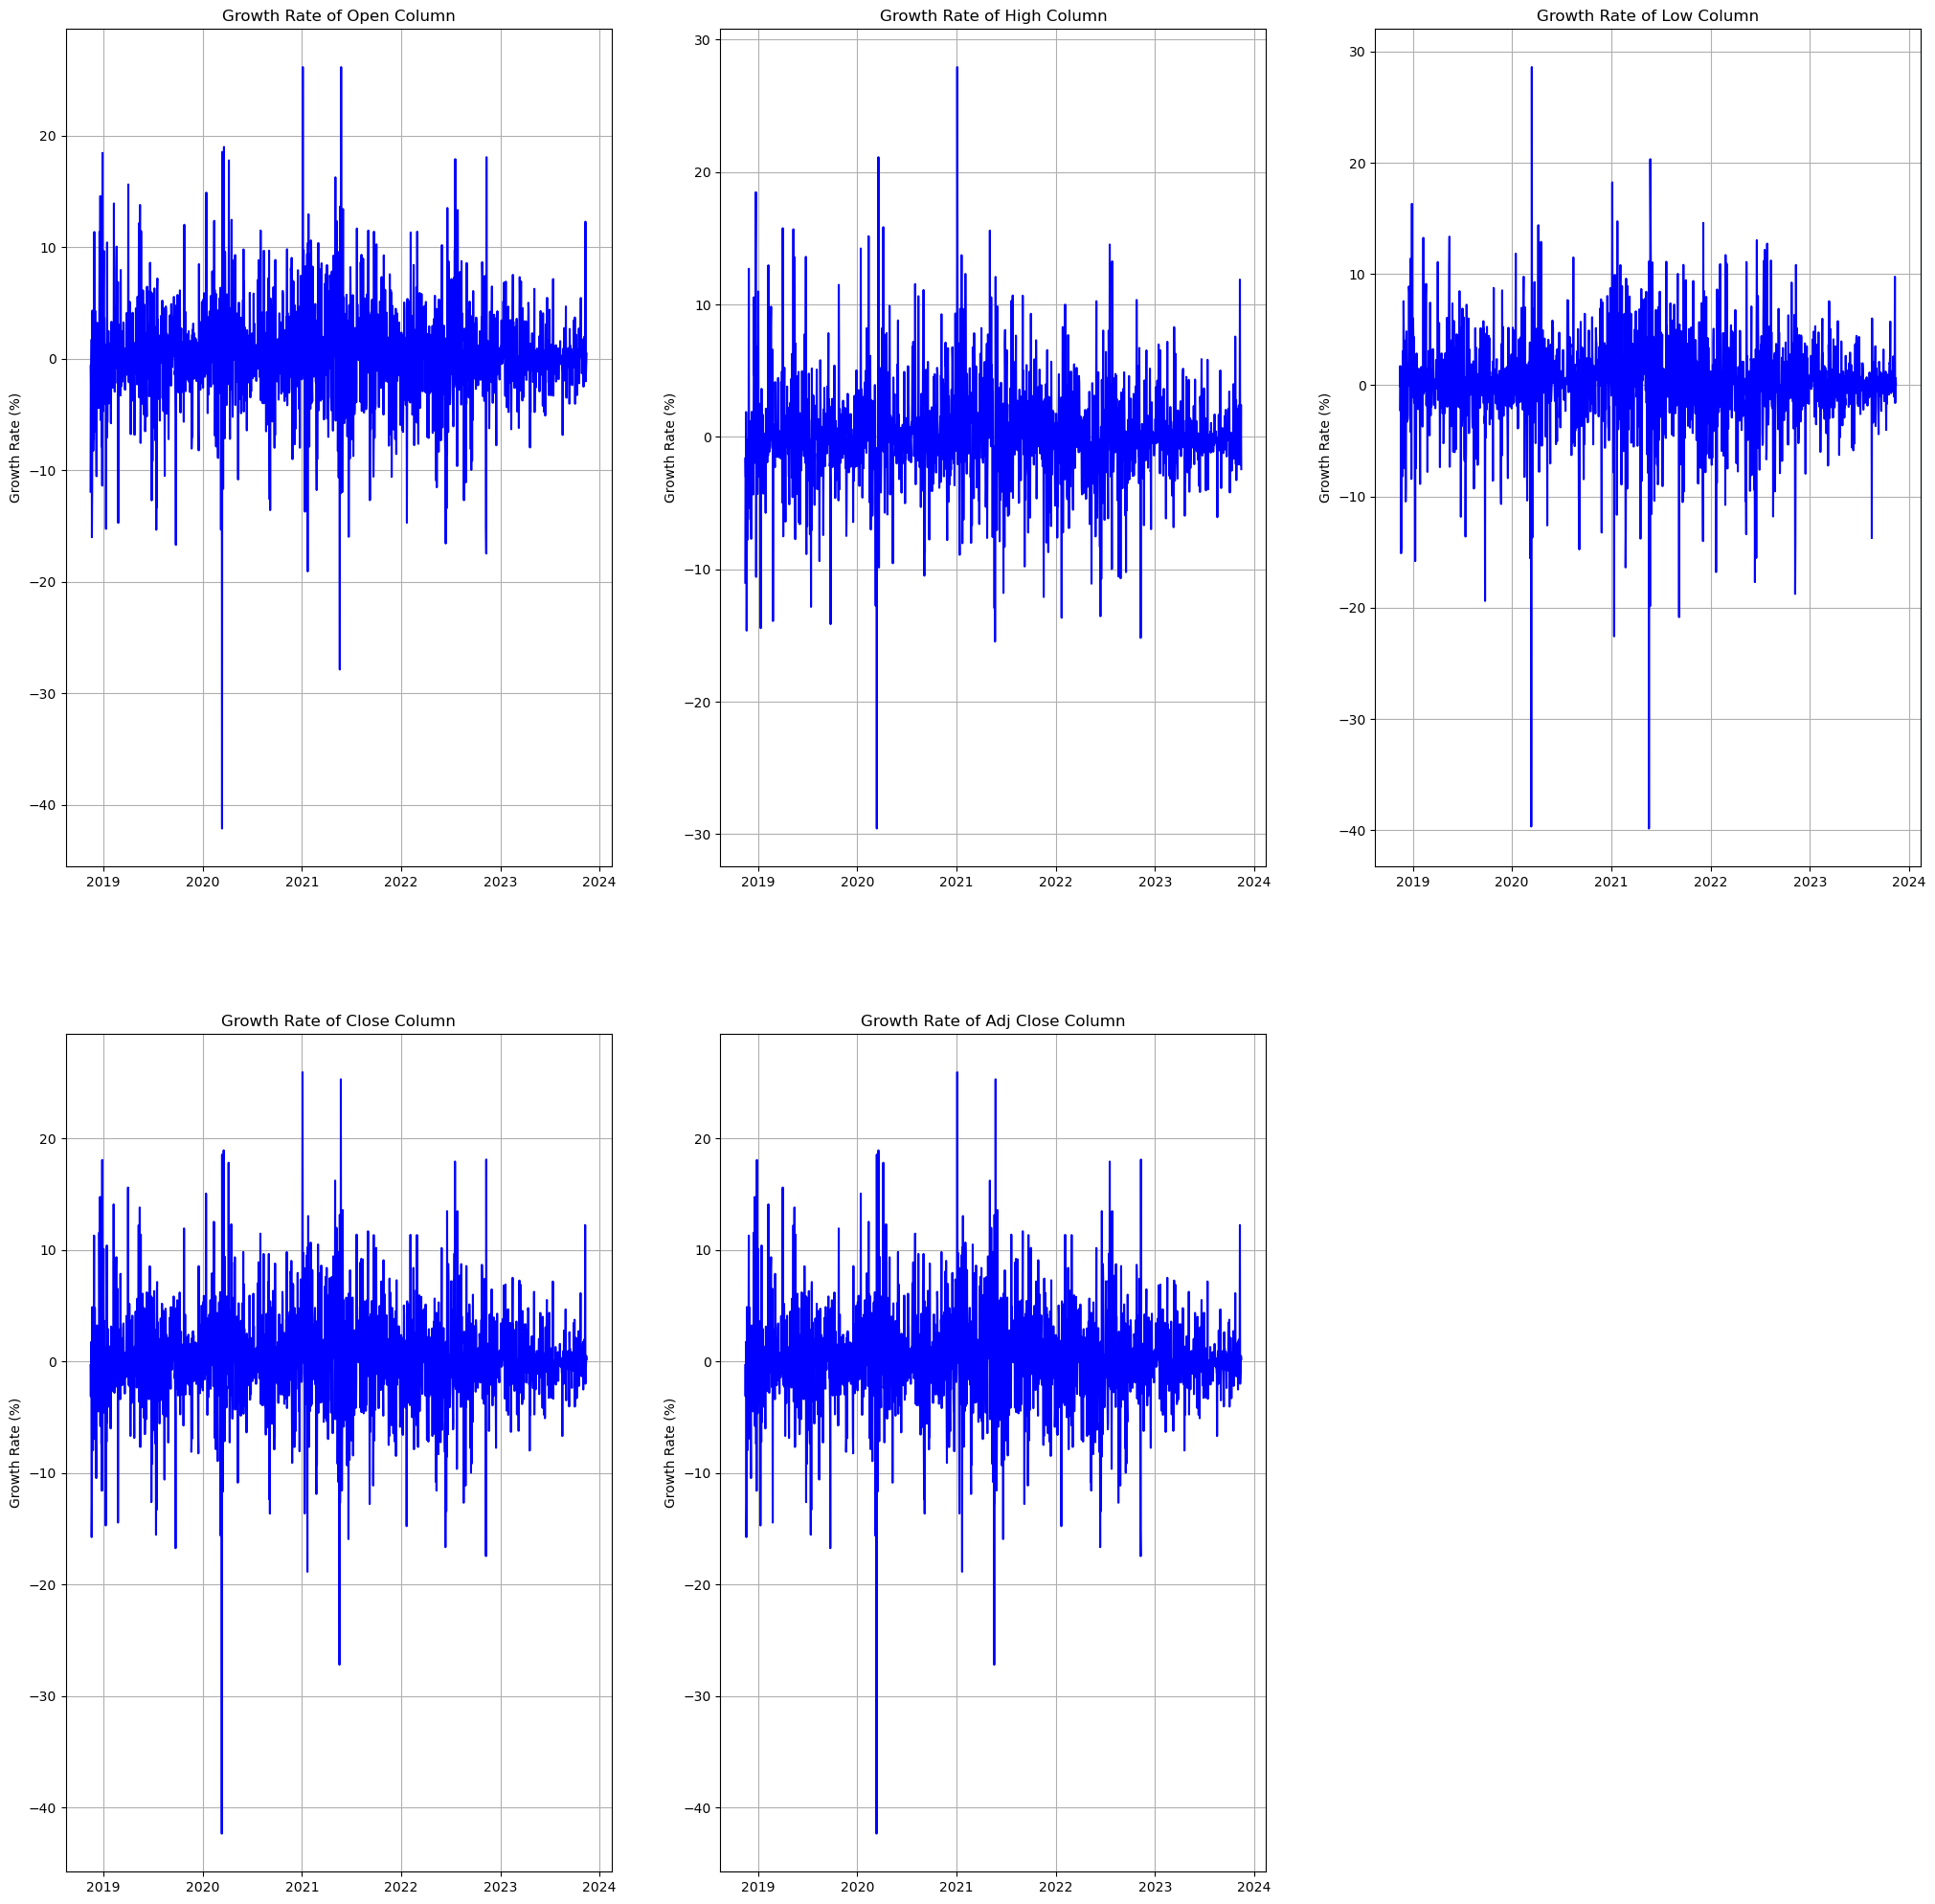

In [11]:
plt.figure(figsize=(25,25))
i=1
for x in eth.columns[:-1]:
    plt.subplot(2,3,i)
    data['Growth Rate'] = (eth[x] - eth[x].shift(1)) / eth[x].shift(1) * 100
    plt.plot(data.index, data['Growth Rate'], linestyle='-', color='b')
    plt.xlabel(None)
    plt.ylabel('Growth Rate (%)')
    plt.title(f'Growth Rate of {x} Column')
    plt.grid(True)
    i+=1
plt.show()

<div style="border-radius: 30px 0 30px 0px; border: 2px solid #00ea98; padding: 20px; background-color: #0a141b; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #7ab052; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Volume Analysis</h1>
</div>


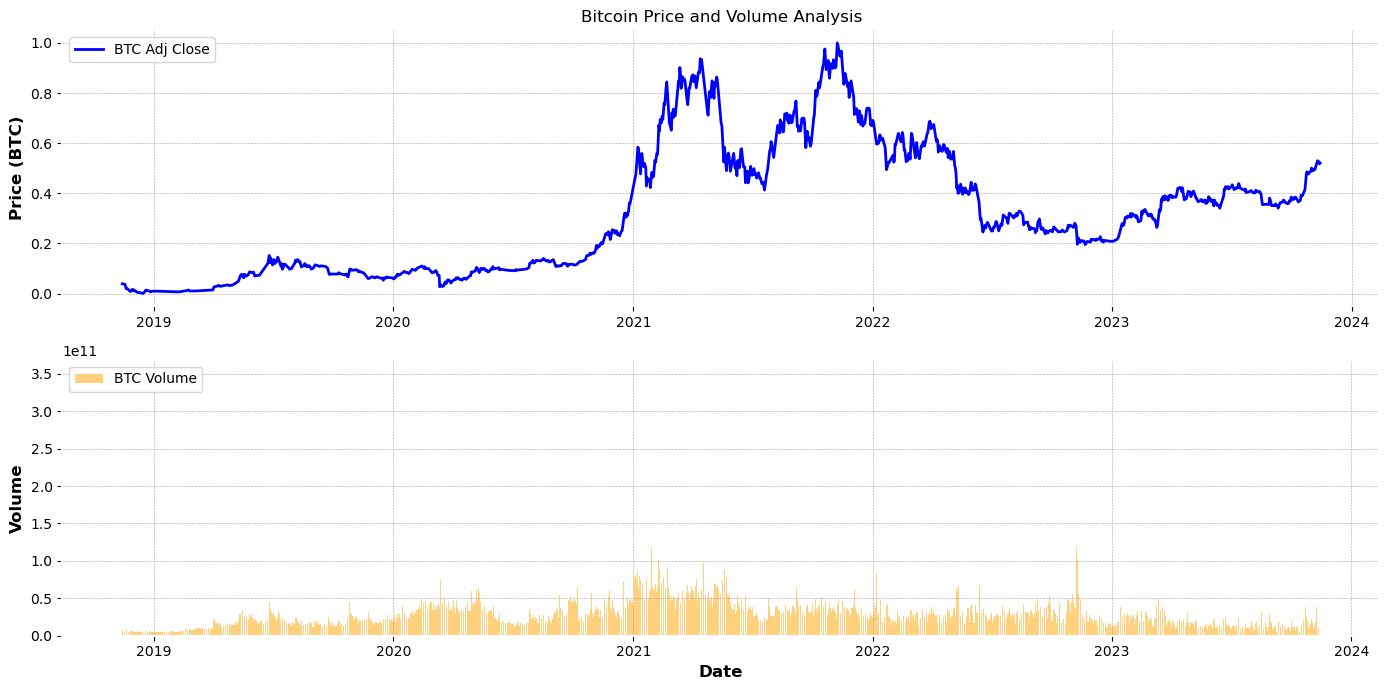

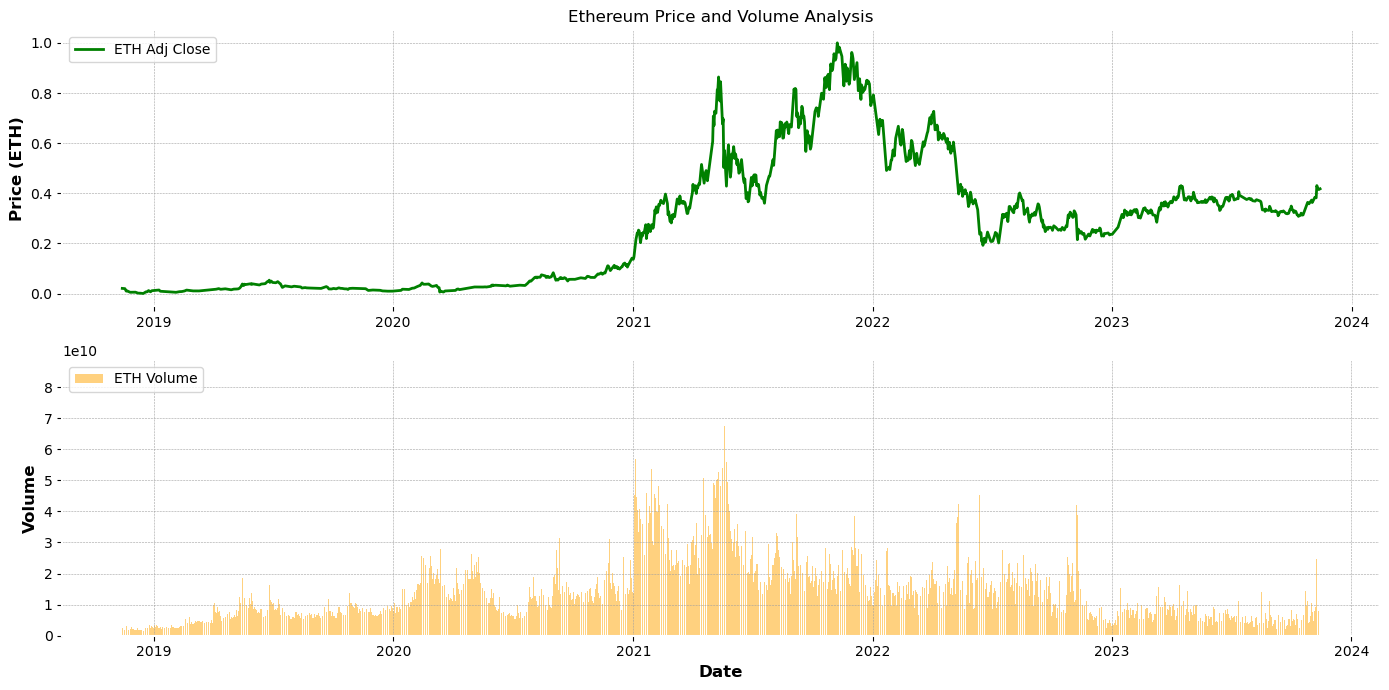

In [32]:
# Plotting Volume alongside Price for Bitcoin
plt.figure(figsize=(14, 7))

# Price plot
plt.subplot(2, 1, 1)
plt.plot(btc.index, btc['Adj Close'], label='BTC Adj Close', color='blue')
plt.title('Bitcoin Price and Volume Analysis')
plt.ylabel('Price (BTC)')
plt.legend(loc='upper left')

# Volume plot
plt.subplot(2, 1, 2)
plt.bar(btc.index, btc['Volume'], label='BTC Volume', color='orange', alpha=0.5)
plt.ylabel('Volume')
plt.xlabel('Date')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Repeat for Ethereum
plt.figure(figsize=(14, 7))

# Price plot
plt.subplot(2, 1, 1)
plt.plot(eth.index, eth['Adj Close'], label='ETH Adj Close', color='green')
plt.title('Ethereum Price and Volume Analysis')
plt.ylabel('Price (ETH)')
plt.legend(loc='upper left')

# Volume plot
plt.subplot(2, 1, 2)
plt.bar(eth.index, eth['Volume'], label='ETH Volume', color='orange', alpha=0.5)
plt.ylabel('Volume')
plt.xlabel('Date')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

<div style="border-radius: 30px 0 30px 0px; border: 2px solid #00ea98; padding: 20px; background-color: #0a141b; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #7ab052; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Moving Average</h1>
</div>


One of the basic analysis technique for time series data is **moving average**. As the name suggests, rather than calculating the average on the whole dataset, moving average **(also called rolling mean)** calculates the average of a subset with a certain window size, and shifts forward. 

Moving average is used to smooth out short-term fluctuations and highlight longer-term trends or cycles.

Let’s see how moving average works on a graph by plotting price data from 01/1/2021 to 31/12/2021. I chose the year 2021 to plot where there is a strong trend in the data to clearly see how moving average works.

#### Bitcoin

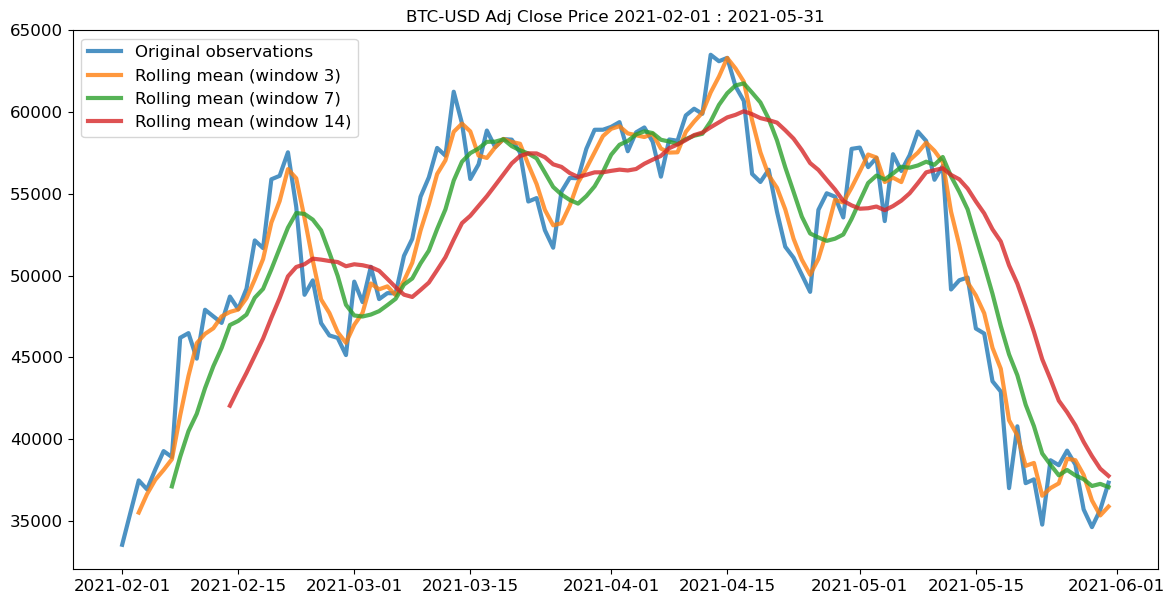

In [12]:
btc_recent = btc["Adj Close"].loc['2021-02-01':'2021-05-31']

rroll_d3 = btc_recent.rolling(window=3).mean()
rroll_d7 = btc_recent.rolling(window=7).mean()
rroll_d14 = btc_recent.rolling(window=14).mean()

plt.figure(figsize=(14, 7))
plt.plot(btc_recent.index, btc_recent, lw=3, alpha=0.8,label='Original observations')
plt.plot(btc_recent.index, rroll_d3, lw=3, alpha=0.8,label='Rolling mean (window 3)')
plt.plot(btc_recent.index, rroll_d7, lw=3, alpha=0.8,label='Rolling mean (window 7)')
plt.plot(btc_recent.index, rroll_d14, lw=3, alpha=0.8,label='Rolling mean (window 14)')

plt.title('BTC-USD Adj Close Price 2021-02-01 : 2021-05-31')
plt.tick_params(labelsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.show()

Compared to the original observation, which is plotted with a blue line, we can see the curve of the lines get smoother as window sizes get bigger.

#### Etherium

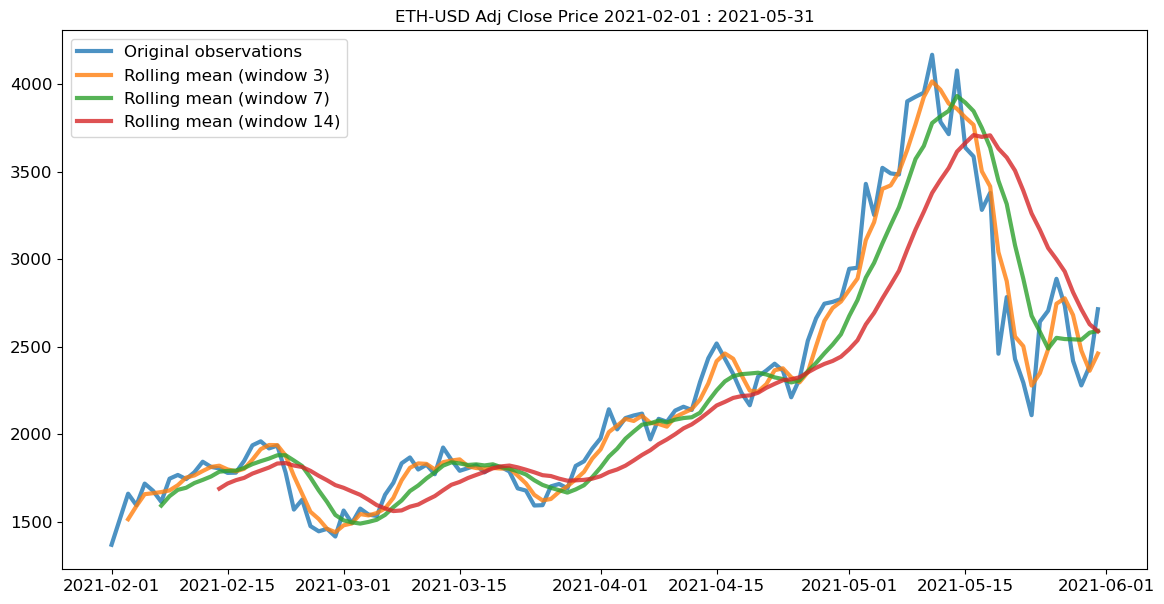

In [13]:
eth_recent = eth["Adj Close"].loc['2021-02-01':'2021-05-31']

rroll_d3 = eth_recent.rolling(window=3).mean()
rroll_d7 = eth_recent.rolling(window=7).mean()
rroll_d14 = eth_recent.rolling(window=14).mean()

plt.figure(figsize=(14, 7))
plt.plot(eth_recent.index, eth_recent, lw=3, alpha=0.8,label='Original observations')
plt.plot(eth_recent.index, rroll_d3, lw=3, alpha=0.8,label='Rolling mean (window 3)')
plt.plot(eth_recent.index, rroll_d7, lw=3, alpha=0.8,label='Rolling mean (window 7)')
plt.plot(eth_recent.index, rroll_d14, lw=3, alpha=0.8,label='Rolling mean (window 14)')

plt.title('ETH-USD Adj Close Price 2021-02-01 : 2021-05-31')
plt.tick_params(labelsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.show()

<div style="border-radius: 30px 0 30px 0px; border: 2px solid #00ea98; padding: 20px; background-color: #0a141b; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #7ab052; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Volatility Analysis</h1>
</div>


Volatility analysis is crucial in understanding the degree of variation or dispersion of returns for an asset. For Bitcoin or any other financial instrument, high volatility might present both opportunities and risks for investors or traders. 

#### Bitcoin

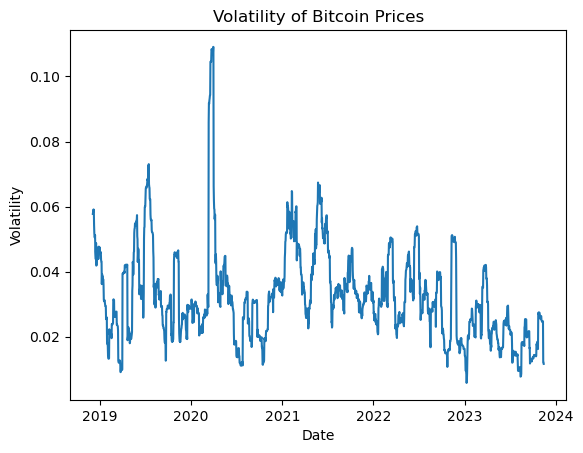

In [14]:
btc['Volatility'] = btc["Adj Close"].pct_change().rolling(window=20).std()

plt.plot(btc.index, btc['Volatility'])
plt.title('Volatility of Bitcoin Prices')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()

#### Etherium

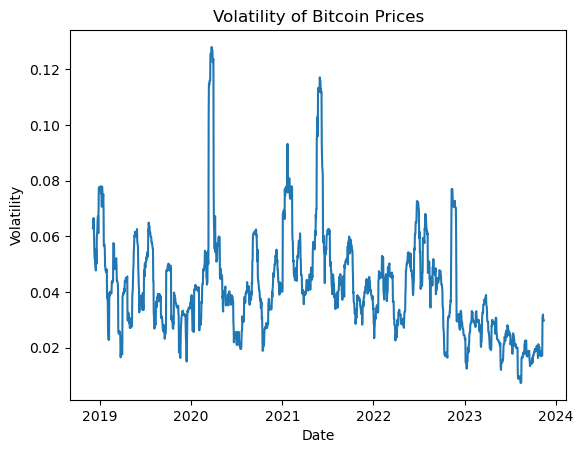

In [15]:
eth['Volatility'] = eth["Adj Close"].pct_change().rolling(window=20).std()

plt.plot(btc.index, eth['Volatility'])
plt.title('Volatility of Bitcoin Prices')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()

<div style="border-radius: 30px 0 30px 0px; border: 2px solid #00ea98; padding: 20px; background-color: #0a141b; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #7ab052; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Seasonal Trends</h1>
</div>


Analyzing seasonal trends in Bitcoin or any financial time series data involves identifying repeating patterns or behaviors that occur at specific times of the year. Seasonal trends can be influenced by various factors, including holidays, market cycles, or other external events. 

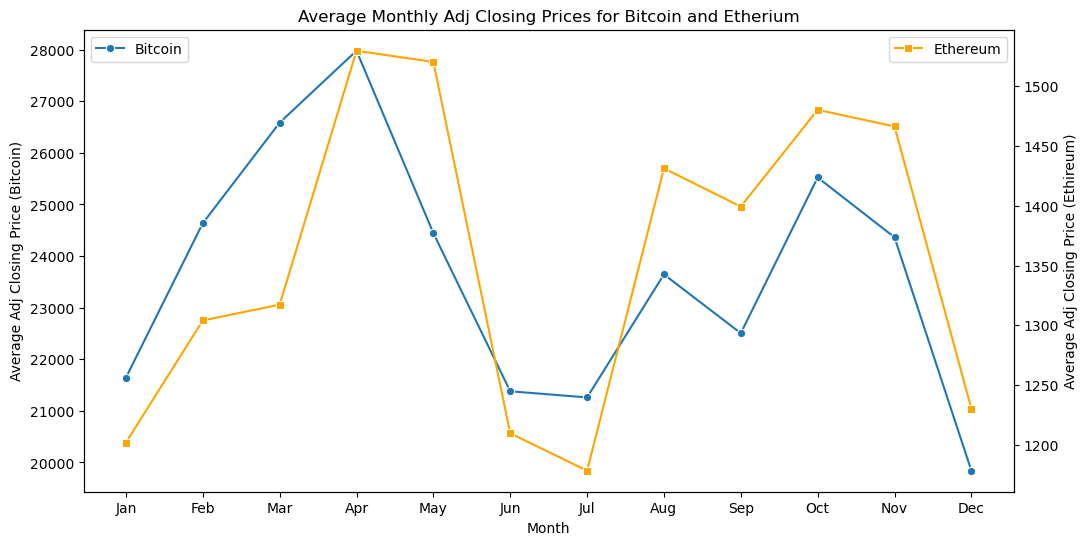

In [16]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

average_monthly_prices = df.groupby(['Month', 'Currency'])['Adj Close'].mean().reset_index()

pivot_table = average_monthly_prices.pivot(index='Month', columns='Currency', values='Adj Close')

plt.figure(figsize=(12, 6))
ax1 = sns.lineplot(data=pivot_table['Bitcoin'], marker='o', label='Bitcoin')

ax2 = ax1.twinx()
sns.lineplot(data=pivot_table['Etherium'], marker='s', color='orange', ax=ax2, label='Ethereum')

ax1.set_title('Average Monthly Adj Closing Prices for Bitcoin and Etherium')
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Adj Closing Price (Bitcoin)')
ax2.set_ylabel('Average Adj Closing Price (Ethireum)')

ax1.set_xticks(range(1, 13))
ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

<div style="border-radius: 30px 0 30px 0px; border: 2px solid #00ea98; padding: 20px; background-color: #0a141b; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #7ab052; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Market Prediction : Time Series</h1>
</div>


### Scaling Data

In [17]:
scaler = MinMaxScaler()
btc['Adj Close'] = scaler.fit_transform(btc[['Adj Close']])
eth['Adj Close'] = scaler.fit_transform(eth[['Adj Close']])

### Spliting Data

In [18]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        dataX.append(dataset[i:(i + look_back)])
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

In [19]:
split_idx = int(len(btc) * 0.8)
train_data_btc = btc.iloc[:split_idx]
test_data_btc = btc.iloc[split_idx:]

trainX_btc, trainY_btc = create_dataset(train_data_btc['Adj Close'].values, 30)
testX_btc, testY_btc = create_dataset(test_data_btc['Adj Close'].values, 30)

In [20]:
split_idx = int(len(btc) * 0.8)
train_data_eth = eth.iloc[:split_idx]
test_data_eth = eth.iloc[split_idx:]

trainX_eth, trainY_eth = create_dataset(train_data_eth['Adj Close'].values, 30)
testX_eth, testY_eth = create_dataset(test_data_eth['Adj Close'].values, 30)

<div style="border-radius: 30px 0 30px 0px; border: 2px solid #00ea98; padding: 20px; background-color: #0a141b; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #7ab052; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Reshape Data for LSTM</h1>
</div>


In [21]:
trainX_btc = np.reshape(trainX_btc, (trainX_btc.shape[0], trainX_btc.shape[1], 1))
testX_btc = np.reshape(testX_btc, (testX_btc.shape[0], testX_btc.shape[1], 1))

trainX_eth = np.reshape(trainX_eth, (trainX_eth.shape[0], trainX_eth.shape[1], 1))
testX_eth = np.reshape(testX_eth, (testX_eth.shape[0], testX_eth.shape[1], 1))

### LSTM

<div style="border-radius: 30px 0 30px 0px; border: 2px solid #00ea98; padding: 20px; background-color: #0a141b; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #7ab052; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Bitcoin</h1>
</div>


In [22]:
model = Sequential()
model.add(LSTM(units=50, input_shape=(30, 1)))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
model.fit(trainX_btc, trainY_btc, epochs=50, batch_size=32)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0439
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0015
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0012
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0012
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0011
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0011
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0011
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 9.9412e-04
Epoch 9/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 7.5734e-04
Epoch 10/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 8.1326e-04
Epoch 11/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 7.9593e-04
Epoch 12/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 7.2987e-04
Epoch 13/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 7.3512e-04
Epoch 14/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 7.6451e-04
Epoch 15/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 3

In [23]:
testPredict = model.predict(testX_btc)
testPredict = scaler.inverse_transform(testPredict)
testY_btc = scaler.inverse_transform(testY_btc.reshape(-1, 1))

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


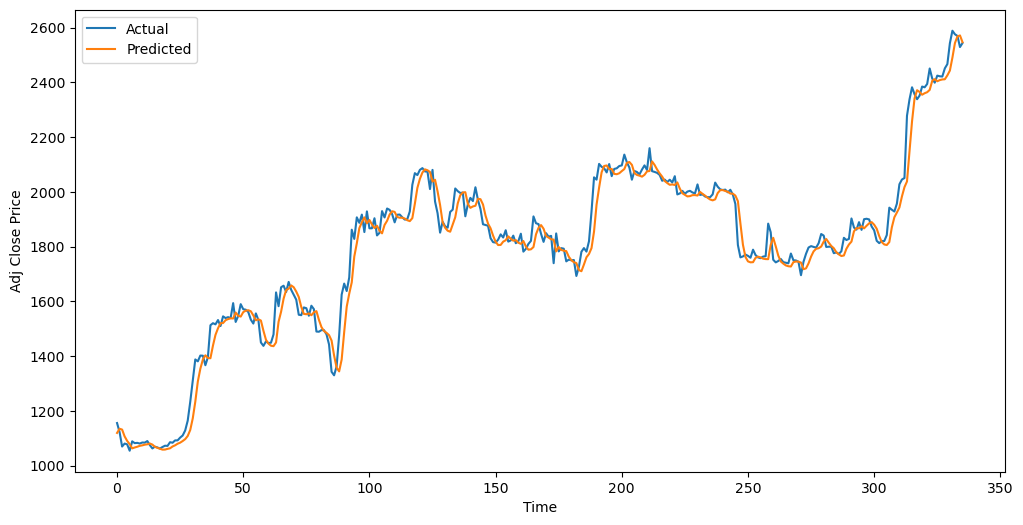

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(testY_btc, label='Actual')
plt.plot(testPredict, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

<div style="border-radius: 30px 0 30px 0px; border: 2px solid #00ea98; padding: 20px; background-color: #0a141b; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #7ab052; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Etherium</h1>
</div>


In [25]:
model = Sequential()
model.add(LSTM(units=50, input_shape=(30, 1)))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
model.fit(trainX_eth, trainY_eth, epochs=50, batch_size=32)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0708
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0020
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0018
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0014
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0014
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0013
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0012
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 9.8687e-04
Epoch 9/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0010
Epoch 10/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 9.9804e-04
Epoch 11/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 9.9519e-04
Epoch 12/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 9.2813e-04
Epoch 13/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 9.4777e-04
Epoch 14/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 9.4852e-04
Epoch 15/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/

In [26]:
testPredict = model.predict(testX_eth)
testPredict = scaler.inverse_transform(testPredict)
testY_eth = scaler.inverse_transform(testY_eth.reshape(-1, 1))

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step


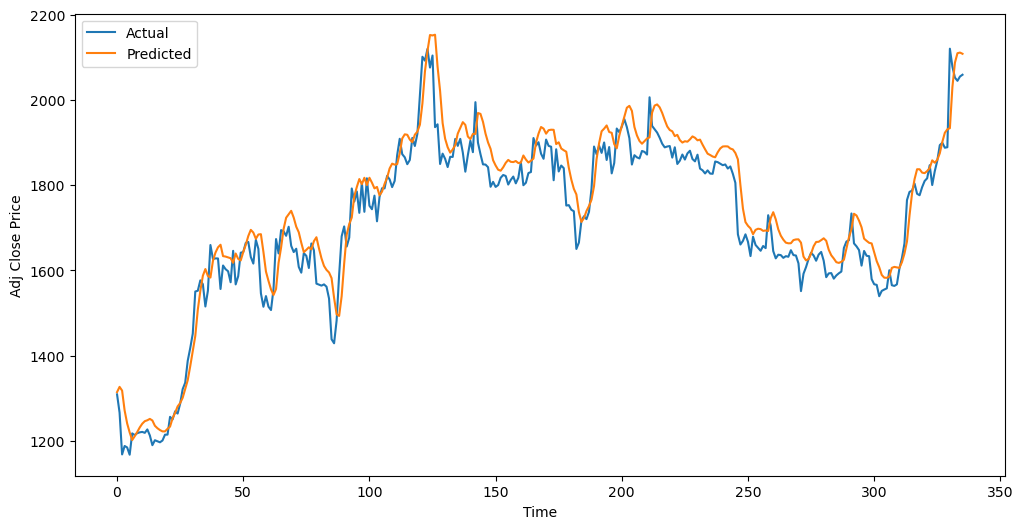

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(testY_eth, label='Actual')
plt.plot(testPredict, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()